In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t
import matplotlib.pyplot as plt

In [2]:
n = 50
C = 4

CSV = {
    "K0": pd.read_csv("K0.csv").fillna(0),          # K = 0 and p = 0.5
    "K1000": pd.read_csv("K1000.csv").fillna(0),    # K = 1000 and p = 0.5
    "p0": pd.read_csv("p0.csv").fillna(0),          # K = NA and p = 0.0
    "p1": pd.read_csv("p1.csv").fillna(0),          # K = NA and p = 1.0
}

for key in CSV:
    CSV[key] = CSV[key][CSV[key]["type"] == "scalar"]
    CSV[key] = CSV[key][CSV[key]["module"].str.contains("SuperMarket.checkout.queues")]
    CSV[key] = CSV[key][CSV[key]["name"] == "queueLength:timeavg"]

degeneracy = {}

Q = []
for i in range(C):
    Q.append(f"Q{i}")

for key in CSV:
    degeneracy[key] = pd.DataFrame(columns=Q)
    for i in range(C):
        temp = []
        temp = [CSV[key]["value"].values[j*C + i] for j in range(n)]
        string = f"Q{i}"
        temp = list(map(float, temp))
        degeneracy[key][string] = temp
    



In [3]:
# K = 0 and p = 0.5
degeneracy["K0"].describe()

,Q0,Q1,Q2,Q3
count,50.0,50.0,50.000000,50.000000
mean,0.0,0.0,17.572241,17.080034
std,0.0,0.0,9.270586,9.268955
min,0.0,0.0,4.964245,4.455541
25%,0.0,0.0,9.574048,9.074039
50%,0.0,0.0,15.160190,14.622817
75%,0.0,0.0,24.422772,23.878622
max,0.0,0.0,36.928097,36.386388


In [4]:
# K = 1000 and p = 0.5
degeneracy["K1000"].describe()

,Q0,Q1,Q2,Q3
count,50.000000,50.000000,50.0,50.0
mean,17.572241,17.080034,0.0,0.0
std,9.270586,9.268955,0.0,0.0
min,4.964245,4.455541,0.0,0.0
25%,9.574048,9.074039,0.0,0.0
50%,15.160190,14.622817,0.0,0.0
75%,24.422772,23.878622,0.0,0.0
max,36.928097,36.386388,0.0,0.0


In [5]:
# K = NA and p = 0.0
degeneracy["p0"].describe()

,Q0,Q1,Q2,Q3
count,50.000000,50.000000,50.000000,50.000000
mean,0.600729,0.362855,0.161815,0.050008
std,0.018396,0.019952,0.018349,0.010892
min,0.564415,0.323906,0.123894,0.029284
25%,0.588736,0.349654,0.149469,0.043081
50%,0.599867,0.361951,0.162289,0.049338
75%,0.608052,0.376277,0.175500,0.056389
max,0.650964,0.405771,0.195792,0.080785


In [6]:
# K = NA and p = 1.0
degeneracy["p1"].describe()

,Q0,Q1,Q2,Q3
count,50.000000,50.000000,50.000000,50.000000
mean,0.600729,0.362855,0.161815,0.050008
std,0.018396,0.019952,0.018349,0.010892
min,0.564415,0.323906,0.123894,0.029284
25%,0.588736,0.349654,0.149469,0.043081
50%,0.599867,0.361951,0.162289,0.049338
75%,0.608052,0.376277,0.175500,0.056389
max,0.650964,0.405771,0.195792,0.080785


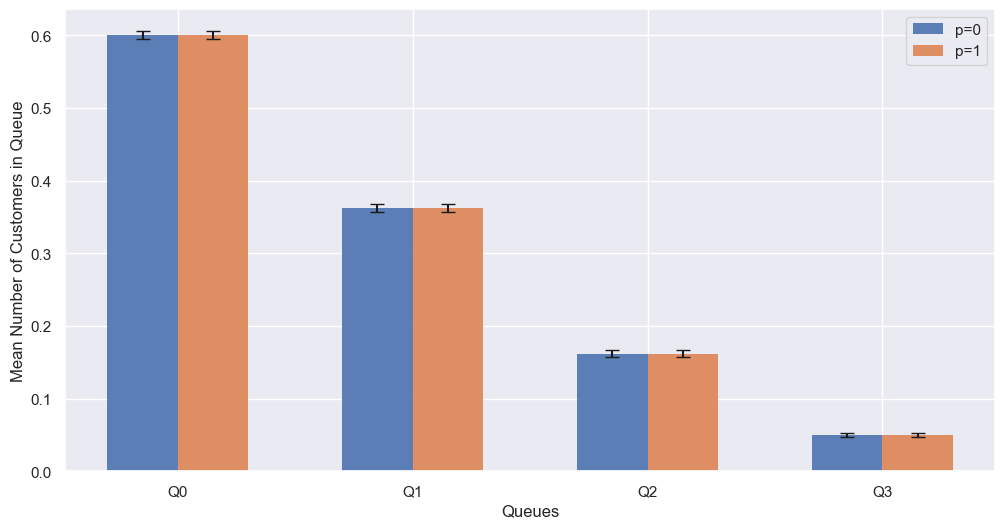

In [7]:
# (BarPlot) Mean Number of Customers in Queue in the following configurations:
configurations = ["p0", "p1"]

# width of the bars
barWidth = 0.3

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

rx = np.arange(len(Q))

for cc in configurations:

    # We save in y_V all the values for the current cc
    y_V = []

    # Confidence Interval Bounds
    y_err = []

    for q in Q:

        y_V.append(degeneracy[cc][q].mean())

        y_err.append(1.96 * (degeneracy[cc][q].std() / math.sqrt(n)))

    plt.bar(rx, y_V, width = barWidth, edgecolor = 'black', yerr=y_err, capsize=5, label=f"p={cc[1]}", lw=0, alpha=0.9)
    rx = [x + barWidth for x in rx]


# Set the x-axis limits
# plt.xlim(0, 40)  
# Set the y-axis limits
# plt.ylim(0, 900)  

plt.xticks([r + barWidth/2 for r in range(len(Q))], Q)
# plt.title('Bar Plot with CIs for Mean Number of Customers in Queue')
plt.xlabel('Queues')
plt.ylabel('Mean Number of Customers in Queue')

plt.legend()
plt.show()